In [2]:
from readurl import *
from analysis import *

# load data from http://www.worldometers.info/coronavirus/country/
germany = get_data('germany')
italy = get_data('italy')
france = get_data('france')
china = get_data('china')
us = get_data('us')

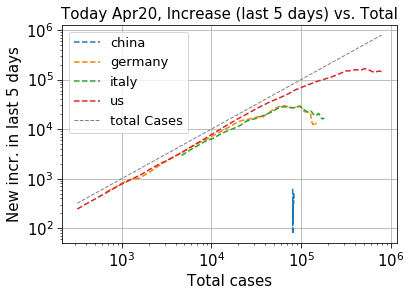

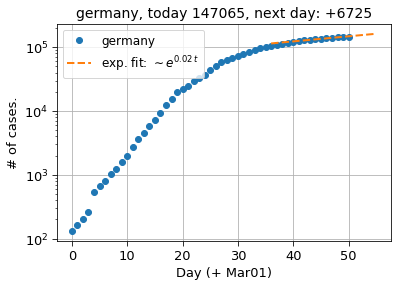

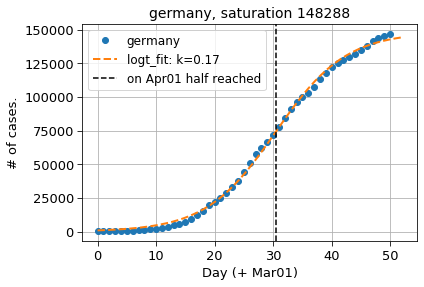

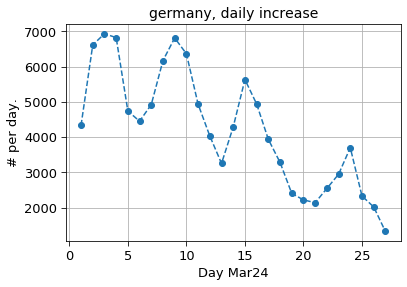

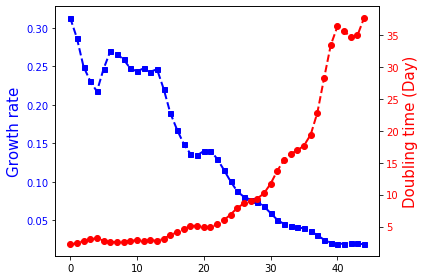

In [3]:
country = germany           # choose country
start_date = "Mar01"        # analysis starting on  use format Apr01
x0 = 5                      # increase during last x0 days
n_fit = 7                   # make fit over last week

countries = [china, germany, italy, us]    
dN_N(countries, start_date)                   # change over total 
fit_total(country, start_date, n_fit, 'exp')  # exponential fit
fit_total(country, start_date, n_fit, 'log')  # logarithmic fit
daily_incr(germany, 'Mar24')                  # daily increase
growth_rate(country, start_date, n_fit)                   # ...

In [6]:
# Another formular for logistic function, K: max of the curve; r: growth rate;
Y_num = Data_DE[start_ind:]

#r_CN=0.235
def fun_logt(t,K,r):
    #r = r_CN
    P0 = Y_num[5]
    y = K/(1+((K-P0)/P0)*np.exp(-r*t))
    return y
popt, pcov = curve_fit(fun_logt, X_date, Y_num, p0=(60000,0.25))

xx = np.linspace(0, 55, 55)
yy = fun_logt(xx, *popt)
plt.plot(X_date,Y_num,'o',label='DE_total')
plt.plot(xx, fun_logt(xx, *popt),'--',lw=2,label='logt_fit: r=%.2f'%popt[1])

plt.title('Germany,next day: %.0f'%(fun_logt(X_date[-1]+1,*popt)),fontsize=14)
plt.xlabel('Day (+ March 3rd)',fontsize=13)
plt.ylabel('# of cases.',fontsize=13)
plt.tick_params(labelsize=13,length=5)
plt.legend(fontsize=12,loc='upper left')
plt.grid()
plt.show()

NameError: name 'Data_DE' is not defined

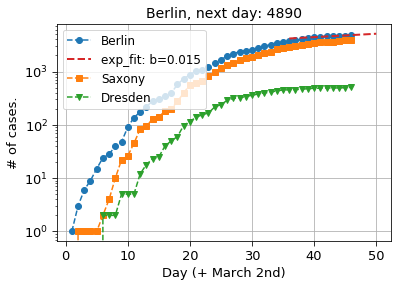

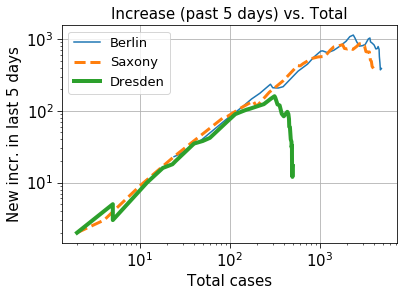

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Germany，data from March 1st
Y_Berlin = [1,3,6,9,15,24,28,40,48,90,137,174,216,283,300,345,391,573,731,866,1025,1077,1220,1428,1656,1955,2161,2360,2464,2575,2754,2970,3202,3471,3613,3670,3845,4028,4202,4349,4458,4567,4601,4668,4722,4848]
Y_Saxony = [0,1,1,1,1,2,4,10,22,26,45,83,93,130,140,182,198,275,394,567,606,653,811,959,1141,1305,1432,1617,1795,1882,2034,2183,2336,2591,2741,2903,2997,3144,3261,3402,3565,3600,3655,3751,3819,3955]
Y_Dresden = [0,0,0,0,0,2,2,2,5,5,5,12,18,23,25,40,50,60,97,115,139,154,167,216,239,287,314,320,339,358,378,398,407,436,448,455,458,466,476,485,486,491,491,492,497,503]
X_date = []
for i in range(len(Y_Berlin)):
    X_date.append(i+1)

n_fit = 5
Y_fit_B = []
X_data_B = []
for i in range(n_fit):
    X_data_B.append(X_date[len(X_date)-n_fit+i])
    Y_fit_B.append(Y_Berlin[len(X_date)-n_fit+i])

def fun_exp(x, a, b):
    return a*np.exp(b*x)
popt, pcov = curve_fit(fun_exp, X_data_B,Y_fit_B, p0=(1,0.2))

xx = np.linspace(len(Y_Berlin)-10, len(Y_Berlin)+4, 50)
yy = fun_exp(xx, *popt)
plt.semilogy(X_date,Y_Berlin,'C0o--',label='Berlin')
plt.semilogy(xx, fun_exp(xx, *popt),'C3--',lw=2,label='exp_fit: b=%5.3f' % popt[1])

plt.semilogy(X_date,Y_Saxony,'C1s--',label='Saxony')
plt.semilogy(X_date,Y_Dresden,'C2v--',label='Dresden')

plt.title('Berlin, next day: %.0f'%(fun_exp(len(X_date)+1,*popt)),fontsize=14)
plt.xlabel('Day (+ March 2nd)',fontsize=13)
plt.ylabel('# of cases.',fontsize=13)
plt.tick_params(labelsize=13,length=5)
plt.legend(fontsize=12,loc='upper left')
plt.grid()
plt.show()

x0 = 5 # increase during last x0 days

Data = Y_Berlin
X_tot = []
Y_incr = []
for i in range(x0,len(Data)):
    Y_incr.append(Data[i]-Data[i-x0])
    X_tot.append(Data[i])
plt.loglog(X_tot,Y_incr,'C0',label='Berlin')

Data = Y_Saxony
X_tot = []
Y_incr = []
for i in range(x0,len(Data)):
    Y_incr.append(Data[i]-Data[i-x0])
    X_tot.append(Data[i])
plt.loglog(X_tot,Y_incr,'C1--',lw=3,label='Saxony')

Data = Y_Dresden
X_tot = []
Y_incr = []
for i in range(x0,len(Data)):
    Y_incr.append(Data[i]-Data[i-x0])
    X_tot.append(Data[i])
plt.loglog(X_tot,Y_incr,'C2',lw=4,label='Dresden')

plt.title('Increase (past %s days) vs. Total'%x0,fontsize=15)
plt.xlabel('Total cases',fontsize=15)
plt.ylabel('New incr. in last %s days'%x0,fontsize=15)
plt.tick_params(labelsize=15,length=5)
plt.grid()
plt.legend(fontsize=13,loc='upper left')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# China, CD: Clinically diagnosed
Y_num_noCD = [62,121,198,291,440,571,830,1287,1975,2744,4515,5974,7711,9692,11791,14380,17205,20438,24324,28018,31161,34546,40171,42638,44653,46472,48467,49970,51091]
Y_num_CD = [62,121,198,291,440,571,830,1287,1975,2744,4515,5974,7711,9692,11791,14380,17205,20438,24324,28018,31161,34546,40171,48315,55220,58761,63851,66492,68500,70548,72436,74185,75002,75891,76288,76936,77150,77658,78064,78497,78824,79251,80026,80151,80270,80409,80552,80651,80695,80735,80754,80778,80793,80813,80824,80844]
Y_num = Y_num_CD
X_date = [] # data from Jan 17st
for i in range(len(Y_num)):
    X_date.append(i+1)

# logistic function, K: max of the curve; r: growth rate;
def fun_logt(t,r):
    K = Y_num[-1]
    P0 = Y_num[0]
    y = K/(1+((K-P0)/P0)*np.exp(-r*t))
    return y
popt, pcov = curve_fit(fun_logt, X_date, Y_num, p0=(0.1))
r_CN = popt[0]

# logistic function, L: max of the curve; k: growth rate; x0: midpoint
def fun_logt(x,k,x0):
    L = max(Y_num)
    y = L/(1+np.exp(-k*(x-x0)))
    return y
popt, pcov = curve_fit(fun_logt, X_date, Y_num, p0=(0.2,20))
k_CN = popt[0]
print('k_CN=',k_CN,'x0=',popt[1])


xx = np.linspace(1, 59, 50)
yy = fun_logt(xx, *popt)
plt.plot(X_date,Y_num,'o',label='CN_tot')
plt.plot(xx,yy,'--',lw=3,label='logt_fit: k=%5.3f' % popt[0])

# exponential fit
Y_num_CD = [62,121,198,291,440,571,830,1287,1975,2744,4515,5974,7711,9692,11791,14380]
Y_num = Y_num_CD
X_date = [] # data from Jan 17st
for i in range(len(Y_num)):
    X_date.append(i+1)
def fun_exp(x, a, b):
    return a*np.exp(b*x)
popt, pcov = curve_fit(fun_exp, X_date, Y_num, p0=(60,0.2))
xx = np.linspace(1, 22, 50)
yy = fun_exp(xx, *popt)
plt.plot(xx,yy,'-.',lw=2,label='exp_fit: b=%5.3f' % popt[1])

#plt.ylim(0,8000)
plt.title('China (incl C.D.), Jan.17th - Mar.14th',fontsize=14)
plt.xlabel('Day (+Jan.17th)',fontsize=13)
plt.ylabel('# of cases.',fontsize=13)
plt.tick_params(labelsize=13,length=5)
plt.legend(fontsize=12)
plt.grid()
plt.show()
popt[0]